In [10]:
## This sample program performs binary addition using RNN in Keras

import numpy as np
import sys
import os
import random
import keras


#change the working directory 
os.chdir('/notebooks/torch')

print("This program runs on version 2.0.6")
print("keras version "+keras.__version__)

This program runs on version 2.0.6
keras version 2.0.6


In [11]:
def genData(): 
    a1=random.randint(0,127)
    a2=random.randint(0,127)
    a3=a1+a2
    tmp1=np.unpackbits(np.uint8(a1))
    tmp2=np.unpackbits(np.uint8(a2))
    y=np.unpackbits(np.uint8(a3))
    tmp1=tmp1[::-1]
    tmp2=tmp2[::-1]
    y=y[::-1]
    tmp1=np.reshape(tmp1, (8,1))
    tmp2=np.reshape(tmp2, (8,1))
    X=np.concatenate((tmp1, tmp2),1)
    y=np.reshape(y,(8,1))
    X=np.expand_dims(X,0)
    y=np.expand_dims(y,0)
    return(X,y)

In [12]:
a,b=genData()
print(a)
print(b)

[[[0 0]
  [1 1]
  [0 1]
  [0 0]
  [1 0]
  [1 1]
  [0 1]
  [0 0]]]
[[[0]
  [0]
  [0]
  [1]
  [1]
  [0]
  [0]
  [1]]]


In [13]:
tmpX, tmpy=genData()
X=tmpX
y=tmpy
# Note the total combination is 127 x 127
NumSample=1000
print("Sample Percentage: "+str(NumSample/(127.*127.)*100))
for i in range(NumSample-1):
  tmpX, tmpy=genData()
  X=np.insert(X, 1, tmpX, axis=0)
  y=np.insert(y, 1, tmpy, axis=0)


Sample Percentage: 6.20001240002


In [14]:
print(X.shape)
print(y.shape)

(1000, 8, 2)
(1000, 8, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

print("Training Sample Percentage: "+str(X_train.shape[0]/(127.*127.)*100))


(670, 8, 2)
(670, 8, 1)
Training Sample Percentage: 4.15400830802


In [43]:
# Build the model.
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint

isCheckpoint=False

model = Sequential()
#model.add(LSTM(256, input_dim=max_features, return_sequences=True))
feature_dim=2
model.add(LSTM(10, input_shape=(None, feature_dim), return_sequences=True))
#model.add(LSTM(256, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dense(1))  #is it dense? or add(LSTM(max_features))
#model.add(Activation('softmax'))

model.compile(loss='mean_squared_error', optimizer='sgd')


# It is a best practice to use checkpoint 
callbacks_list=None
if isCheckpoint==True:
  filepath="weight/RNN_BinaryAddition-{epoch:02d}-{val_loss:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]

history=model.fit(X_train, y_train, validation_split=0.15 ,batch_size=1, epochs=200,callbacks=callbacks_list)

print("finished")


Train on 569 samples, validate on 101 samples
Epoch 1/200
569/569 [==============================] - 9s - loss: 0.2583 - val_loss: 0.2509
Epoch 2/200
569/569 [==============================] - 7s - loss: 0.2492 - val_loss: 0.2487
Epoch 3/200
569/569 [==============================] - 7s - loss: 0.2486 - val_loss: 0.2479
Epoch 4/200
569/569 [==============================] - 8s - loss: 0.2482 - val_loss: 0.2476
Epoch 5/200
569/569 [==============================] - 8s - loss: 0.2480 - val_loss: 0.2476
Epoch 6/200
569/569 [==============================] - 7s - loss: 0.2479 - val_loss: 0.2471
Epoch 7/200
569/569 [==============================] - 9s - loss: 0.2476 - val_loss: 0.2470
Epoch 8/200
569/569 [==============================] - 7s - loss: 0.2477 - val_loss: 0.2470
Epoch 9/200
569/569 [==============================] - 7s - loss: 0.2477 - val_loss: 0.2494
Epoch 10/200
569/569 [==============================] - 7s - loss: 0.2474 - val_loss: 0.2478
Epoch 11/200
569/569 [===========

569/569 [==============================] - 7s - loss: 0.2312 - val_loss: 0.2312
Epoch 89/200
569/569 [==============================] - 7s - loss: 0.2300 - val_loss: 0.2302
Epoch 90/200
569/569 [==============================] - 7s - loss: 0.2289 - val_loss: 0.2292
Epoch 91/200
569/569 [==============================] - 7s - loss: 0.2281 - val_loss: 0.2286
Epoch 92/200
569/569 [==============================] - 8s - loss: 0.2271 - val_loss: 0.2271
Epoch 93/200
569/569 [==============================] - 8s - loss: 0.2258 - val_loss: 0.2258
Epoch 94/200
569/569 [==============================] - 7s - loss: 0.2245 - val_loss: 0.2267
Epoch 95/200
569/569 [==============================] - 6s - loss: 0.2234 - val_loss: 0.2231
Epoch 96/200
569/569 [==============================] - 8s - loss: 0.2220 - val_loss: 0.2221
Epoch 97/200
569/569 [==============================] - 7s - loss: 0.2205 - val_loss: 0.2211
Epoch 98/200
569/569 [==============================] - 8s - loss: 0.2186 - val_los

569/569 [==============================] - 7s - loss: 0.0027 - val_loss: 0.0025
Epoch 176/200
569/569 [==============================] - 7s - loss: 0.0026 - val_loss: 0.0025
Epoch 177/200
569/569 [==============================] - 7s - loss: 0.0025 - val_loss: 0.0024
Epoch 178/200
569/569 [==============================] - 7s - loss: 0.0025 - val_loss: 0.0024
Epoch 179/200
569/569 [==============================] - 7s - loss: 0.0024 - val_loss: 0.0023
Epoch 180/200
569/569 [==============================] - 6s - loss: 0.0023 - val_loss: 0.0022
Epoch 181/200
569/569 [==============================] - 7s - loss: 0.0023 - val_loss: 0.0022
Epoch 182/200
569/569 [==============================] - 6s - loss: 0.0022 - val_loss: 0.0021
Epoch 183/200
569/569 [==============================] - 6s - loss: 0.0022 - val_loss: 0.0021
Epoch 184/200
569/569 [==============================] - 6s - loss: 0.0021 - val_loss: 0.0020
Epoch 185/200
569/569 [==============================] - 7s - loss: 0.0021

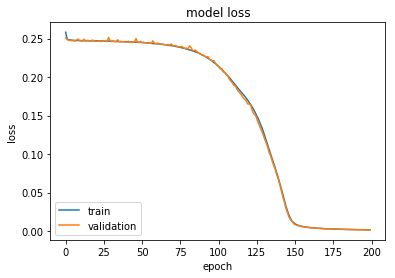

In [45]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [46]:
score = model.evaluate(X_test, y_test, batch_size=1)

# predict(self, x, batch_size=32, verbose=0)

321/330 [============================>.] - ETA: 0s

In [47]:
print("score: "+str(score))

score: 0.00135907424897


In [48]:
print(X_test.shape)

(330, 8, 2)


In [49]:
predict_y=model.predict(X_test)

In [30]:
print(predict_y.shape)

(330, 8, 1)


In [50]:
print(X_test[0,...])  

[[0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]]


In [51]:
print(predict_y[0,...])  

[[ 0.98763132]
 [-0.00283545]
 [-0.00467482]
 [-0.01041976]
 [ 1.01300597]
 [-0.00527069]
 [-0.00333282]
 [ 1.00169396]]


In [ ]:
#10001001